In [ ]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import numpy as np
import imgaug.augmenters as iaa



DATADIR = "/content/drive/My Drive/Visualizations"
CATEGORIES = ["level0","level2"]


<h2>Creating a function called training data where we will import the images along with the labels into list and also resize all the images to 512 * 512 pixel format

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_COLOR)[...,::-1]
                #img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                #img_array = cv2.addWeighted(img_array,4, cv2.GaussianBlur(img_array , (0,0) , 15) ,-4 ,128)
                new_array = cv2.resize(img_array, (512, 512))
                training_data.append([new_array, class_num])
                #rotate=iaa.Affine(rotate=(90))
                #rotated_image=rotate.augment_image(new_array)
                #training_data.append([rotated_image, class_num])
                #flip_hr=iaa.Fliplr(p=1.0)
                #flip_hr_image= flip_hr.augment_image(new_array)
                #training_data.append([flip_hr_image, class_num])
            except Exception as e:
                pass

In [ ]:
create_training_data()

In [ ]:
len(training_data)

2

In [ ]:
# After reshuffling the data extracting features and labels
X = [] #features
y = [] #labels

for features in training_data:
    X.append(features[0])
    y.append(features[1])
X = np.array(X)
type(X)
X.shape

(2, 512, 512, 3)

<h2> Images before Preprocessing stage

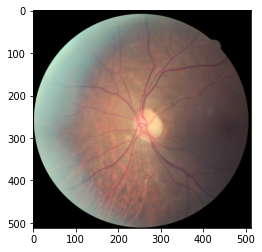

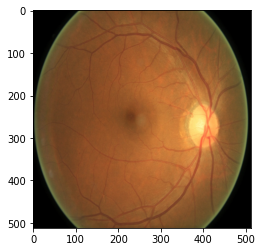

In [ ]:

#fig, ax = plt.subplots(nrows = 1 , ncols = 4)
for i in range(len(X)):
  some_pic = X[i]
  #some_pic_image = some_pic.reshape(512,512)
  #some_pic = cv2.normalize(some_pic,  np.zeros((512, 512)), 0, 255, cv2.NORM_MINMAX)
  plt.imshow(some_pic)#
  plt.show()

<h1>Preprocessing
<h2> 1. Converting images from RGB to Greyscale Images

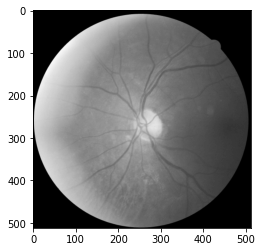

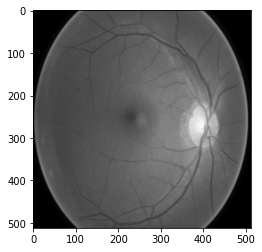

In [ ]:
for i in range(len(X)):
  some_pic = X[i]
  #some_pic_image = some_pic.reshape(512,512)
  some_pic = cv2.cvtColor(some_pic, cv2.COLOR_BGR2GRAY)
  #some_pic = cv2.cvtColor(some_pic, cv2.COLOR_GRAY2RGB)
  #some_pic = cv2.cvtColor(some_pic, cv2.COLOR_RGB2GRAY)
  #some_pic = cv2.addWeighted(some_pic,4, cv2.GaussianBlur(some_pic , (0,0) , 30) ,-4 ,128)
  plt.imshow(some_pic,cmap="gray")
  some_pic.shape
  plt.show()

<h2> 2. Using weighted Gaussian Blur to remove  Gaussian noise from images which can be caused due to resizing. 

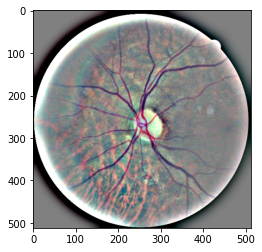

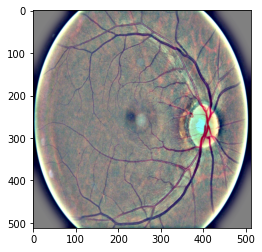

In [ ]:
for i in range(len(X)):
  some_pic = X[i]
  #some_pic_image = some_pic.reshape(512,512)
  #some_pic = cv2.cvtColor(some_pic, cv2.COLOR_BGR2RGBA)
  #some_pic = cv2.cvtColor(some_pic, cv2.COLOR_BGR2GRAY)
  some_pic = cv2.addWeighted(some_pic,4, cv2.GaussianBlur(some_pic , (0,0) , 15) ,-4 ,128)
  plt.imshow(some_pic)
  plt.show()

 <h2>3.Data Augmentation - Here we will add more data from our existing data by rotating the image by 90 degree. 

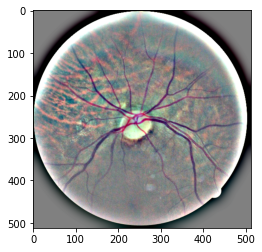

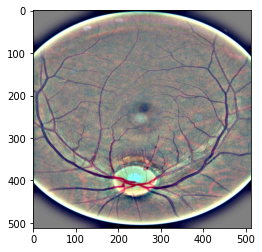

In [ ]:
for i in range(len(X)):
  some_pic = X[i]
  some_pic = cv2.addWeighted(some_pic,4, cv2.GaussianBlur(some_pic , (0,0) , 15) ,-4 ,128)
  rotate=iaa.Affine(rotate=(90))
  rotated_image=rotate.augment_image(some_pic)
  plt.imshow(rotated_image)
  plt.show()

<h2> Here We will flip the image Vertically for data augmentation

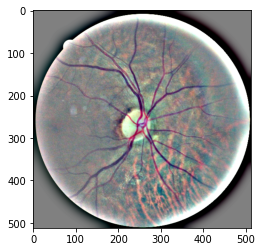

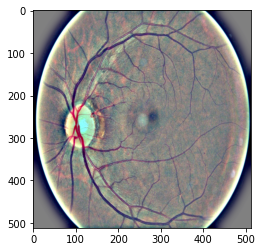

In [ ]:
for i in range(len(X)):
  some_pic = X[i]
  some_pic = cv2.addWeighted(some_pic,4, cv2.GaussianBlur(some_pic , (0,0) , 15) ,-4 ,128)
  flip_hr=iaa.Fliplr(p=1.0)
  flip_hr_image= flip_hr.augment_image(some_pic)
  plt.imshow(flip_hr_image)
  plt.show()

 <h2>As we can see above, Image Augmentations are extremely helpful for this datasets to make our Models more Robust and would also have a higher ability to generalize well

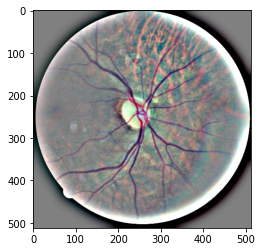

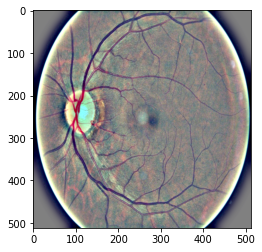

In [ ]:
for i in range(len(X)):
  some_pic = X[i]
  some_pic = cv2.addWeighted(some_pic,4, cv2.GaussianBlur(some_pic , (0,0) , 15) ,-4 ,128)
  rotate=iaa.Affine(rotate=(180))
  rotated_image=rotate.augment_image(some_pic)
  plt.imshow(rotated_image)
  plt.show()

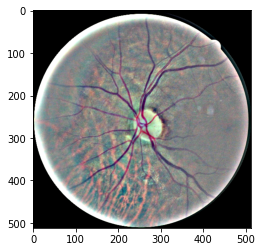

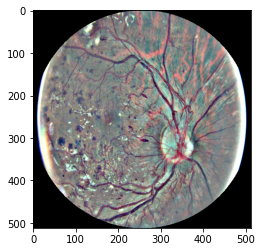

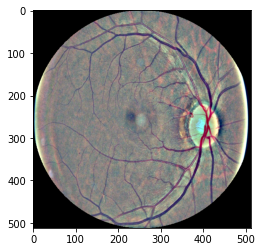

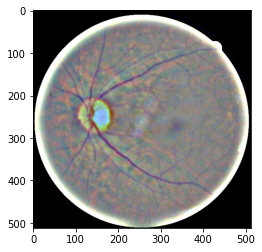

In [ ]:

for i in range(len(X)):
  some_pic = X[i]
  #some_pic_image = some_pic.reshape(512,512)
  #some_pic = cv2.cvtColor(some_pic, cv2.COLOR_BGR2RGB)
  some_pic = cv2.addWeighted(some_pic,4, cv2.GaussianBlur(some_pic , (0,0) , 12) ,-4 ,128)
  height, width, depth = some_pic.shape      
  x = int(width/2)
  y = int(height/2)
  r = np.amin((x,y))
  circle_img = np.zeros((height, width), np.uint8)
  cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
  some_pic = cv2.bitwise_and(some_pic, some_pic, mask=circle_img)
  plt.imshow(some_pic,cmap="gray")
  plt.show()

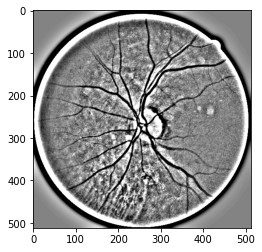

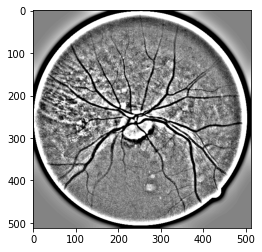

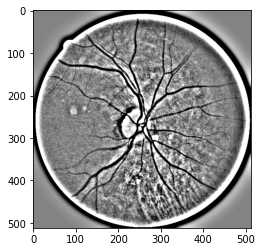

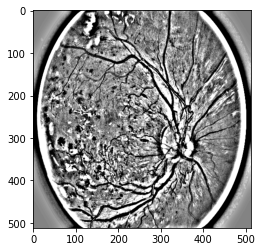

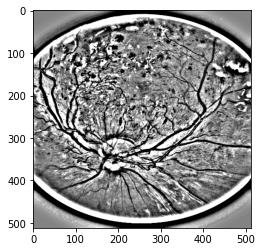

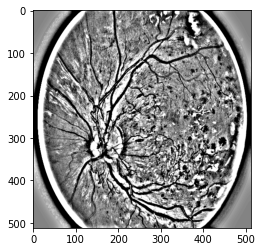

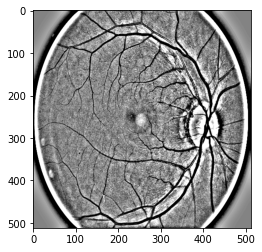

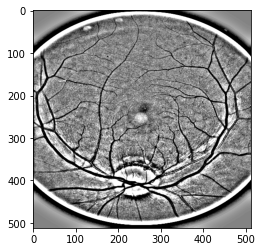

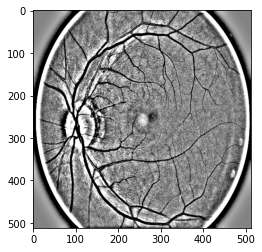

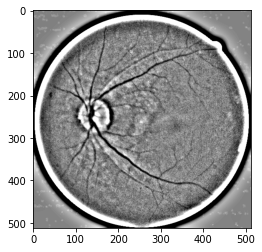

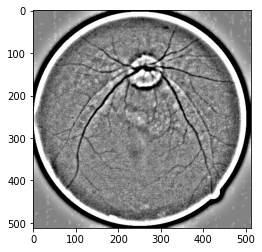

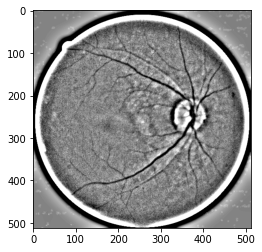

In [ ]:




for i in range(len(X)):
  some_pic = X[i]
  #some_pic_image = some_pic.reshape(512,512)
  #some_pic =subtract_gaussian_blur(some_pic.copy())
  some_pic = cv2.addWeighted(some_pic,4, cv2.GaussianBlur(some_pic , (0,0) , 15) ,-4 ,128)
  #cv.normalize(img,  normalizedImg, 0, 255, cv.NORM_MINMAX)
  plt.imshow(some_pic,cmap="gray")
  plt.show()